In [1]:
import sys
sys.path.append('..')
from tqdm import tqdm
import warnings
from src.visualization import (draw_mlp_clustering_report, run_double_spectral_cluster,
                               run_activations_cluster_experiment, get_activations_cluster_results_tbl)
from src.experiment_tagging import get_model_path
from src.lesion import (perform_lesion_experiment, do_lesion_hypo_tests,
                        plot_all_damaged_clusters,
                        plot_overall_damaged_clusters)
from src.pointers import DATA_PATHS

Using TensorFlow backend.


In [2]:
models = (('HALVES-MNIST+MOD-INIT+L1REG', 'halves_mnist'),
              ('HALVES-FASHION+MOD-INIT+L1REG', 'halves_fashion'),
              ('HALVES-CIFAR10+MOD-INIT+L1REG', 'halves_cifar10'),
              ('CNN-STACKED-MNIST+MOD-INIT+L1REG', 'stacked_mnist'),
              ('CNN-STACKED-FASHION+MOD-INIT+L1REG', 'stacked_fashion'),
              ('CNN-STACKED-CIFAR10+MOD-INIT+L1REG', 'stacked_cifar10'))
datasets = ()
model_paths = {m[0]: get_model_path(m[0]) for m in models}

n_clust = 12
n_samples = 50
n_workers = 10
n_shuffles = 20

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [12:44<1:03:44, 764.95s/it]

 33%|███▎      | 2/6 [25:19<50:47, 761.88s/it]  

 50%|█████     | 3/6 [36:57<37:07, 742.66s/it]

 67%|██████▋   | 4/6 [37:01<17:22, 521.07s/it]

 83%|████████▎ | 5/6 [37:05<06:05, 365.97s/it]

100%|██████████| 6/6 [37:10<00:00, 257.52s/it]

100%|██████████| 6/6 [37:10<00:00, 371.67s/it]

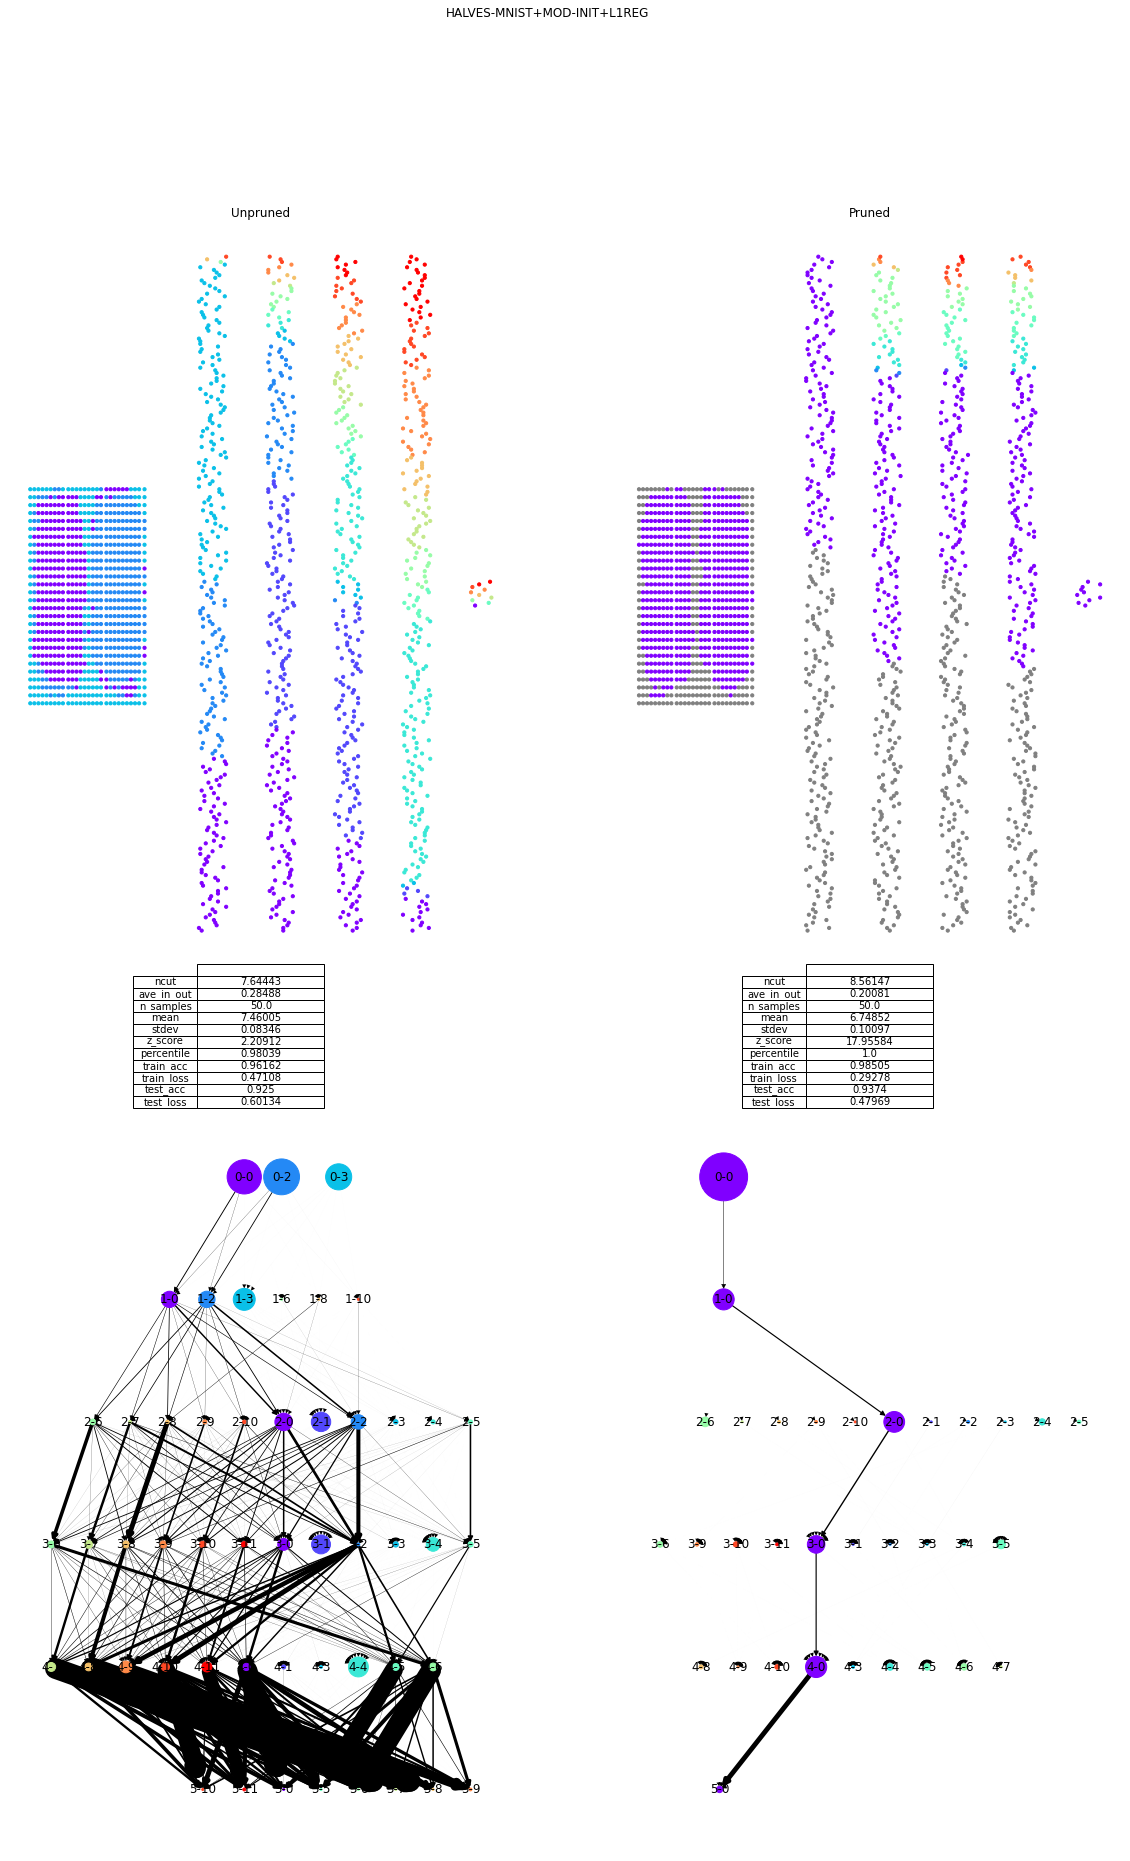

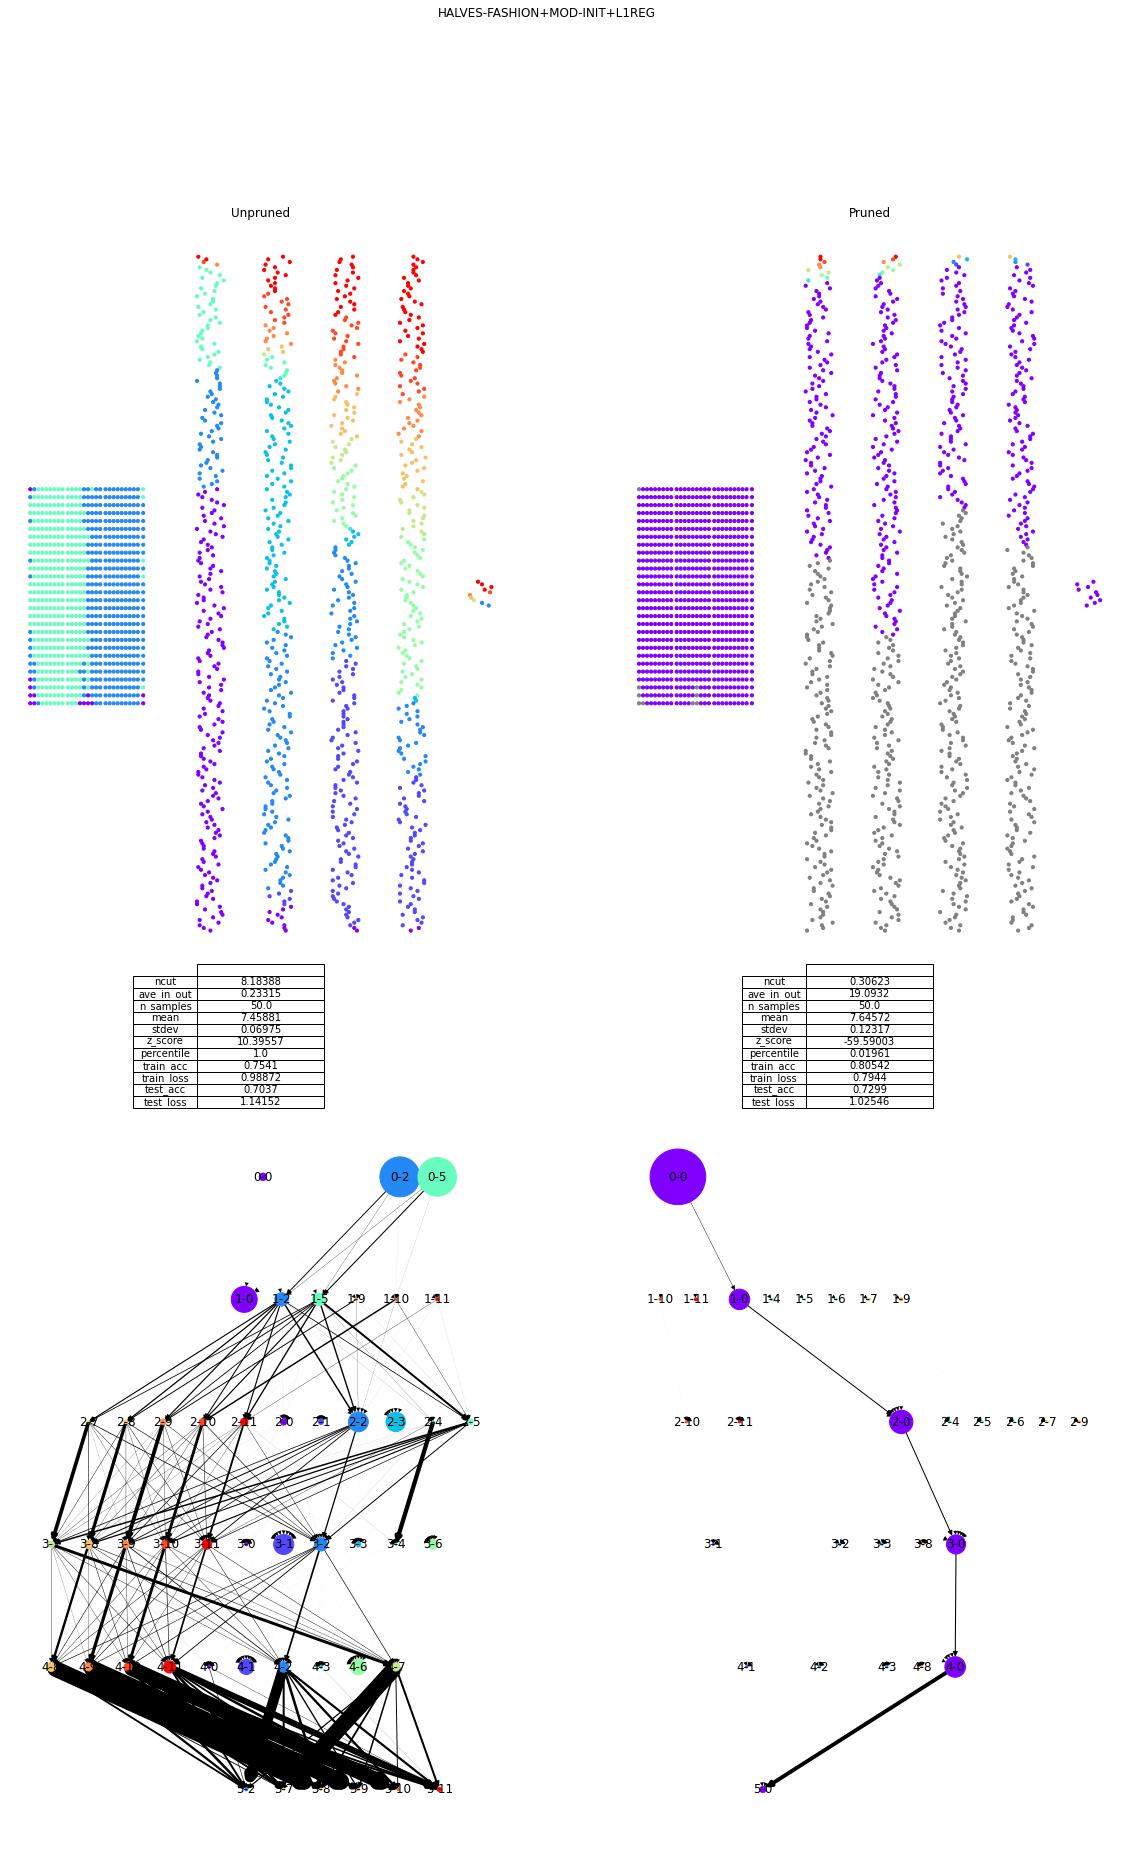

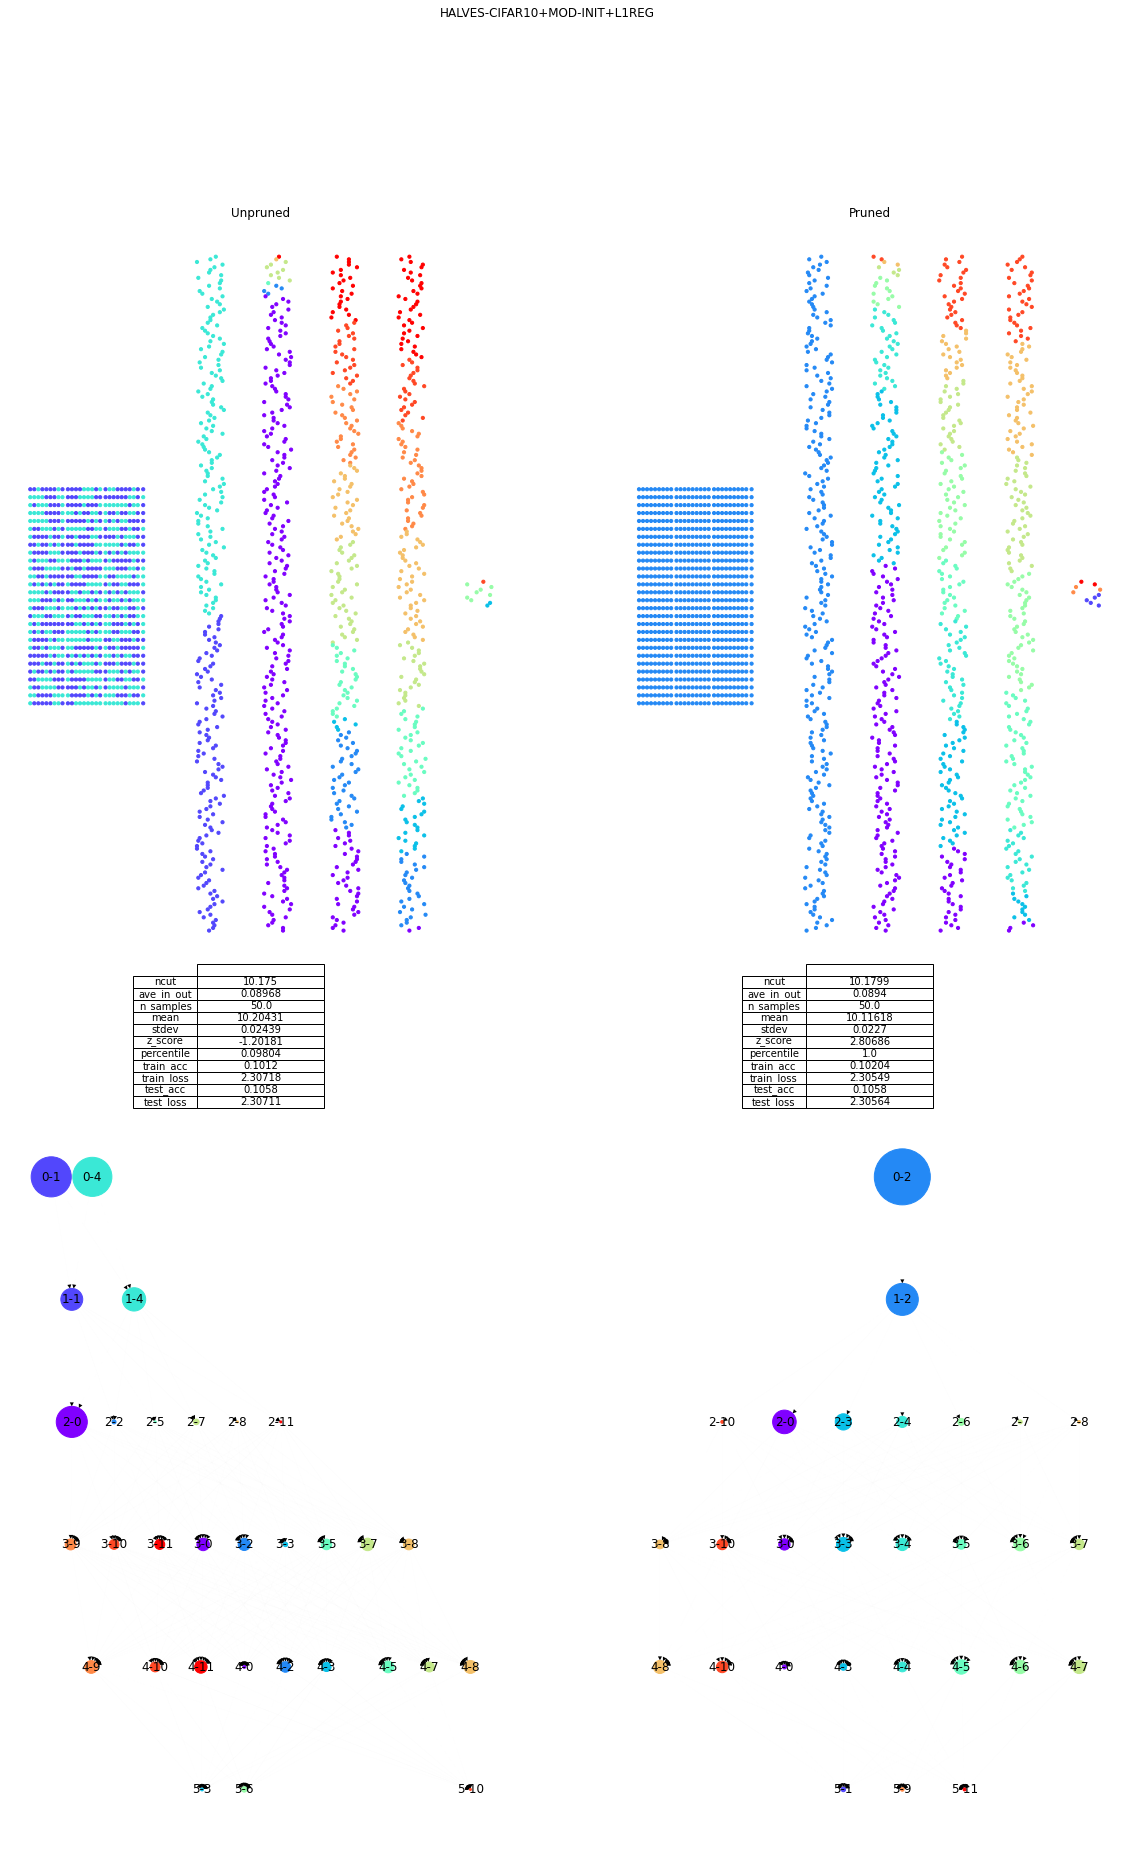

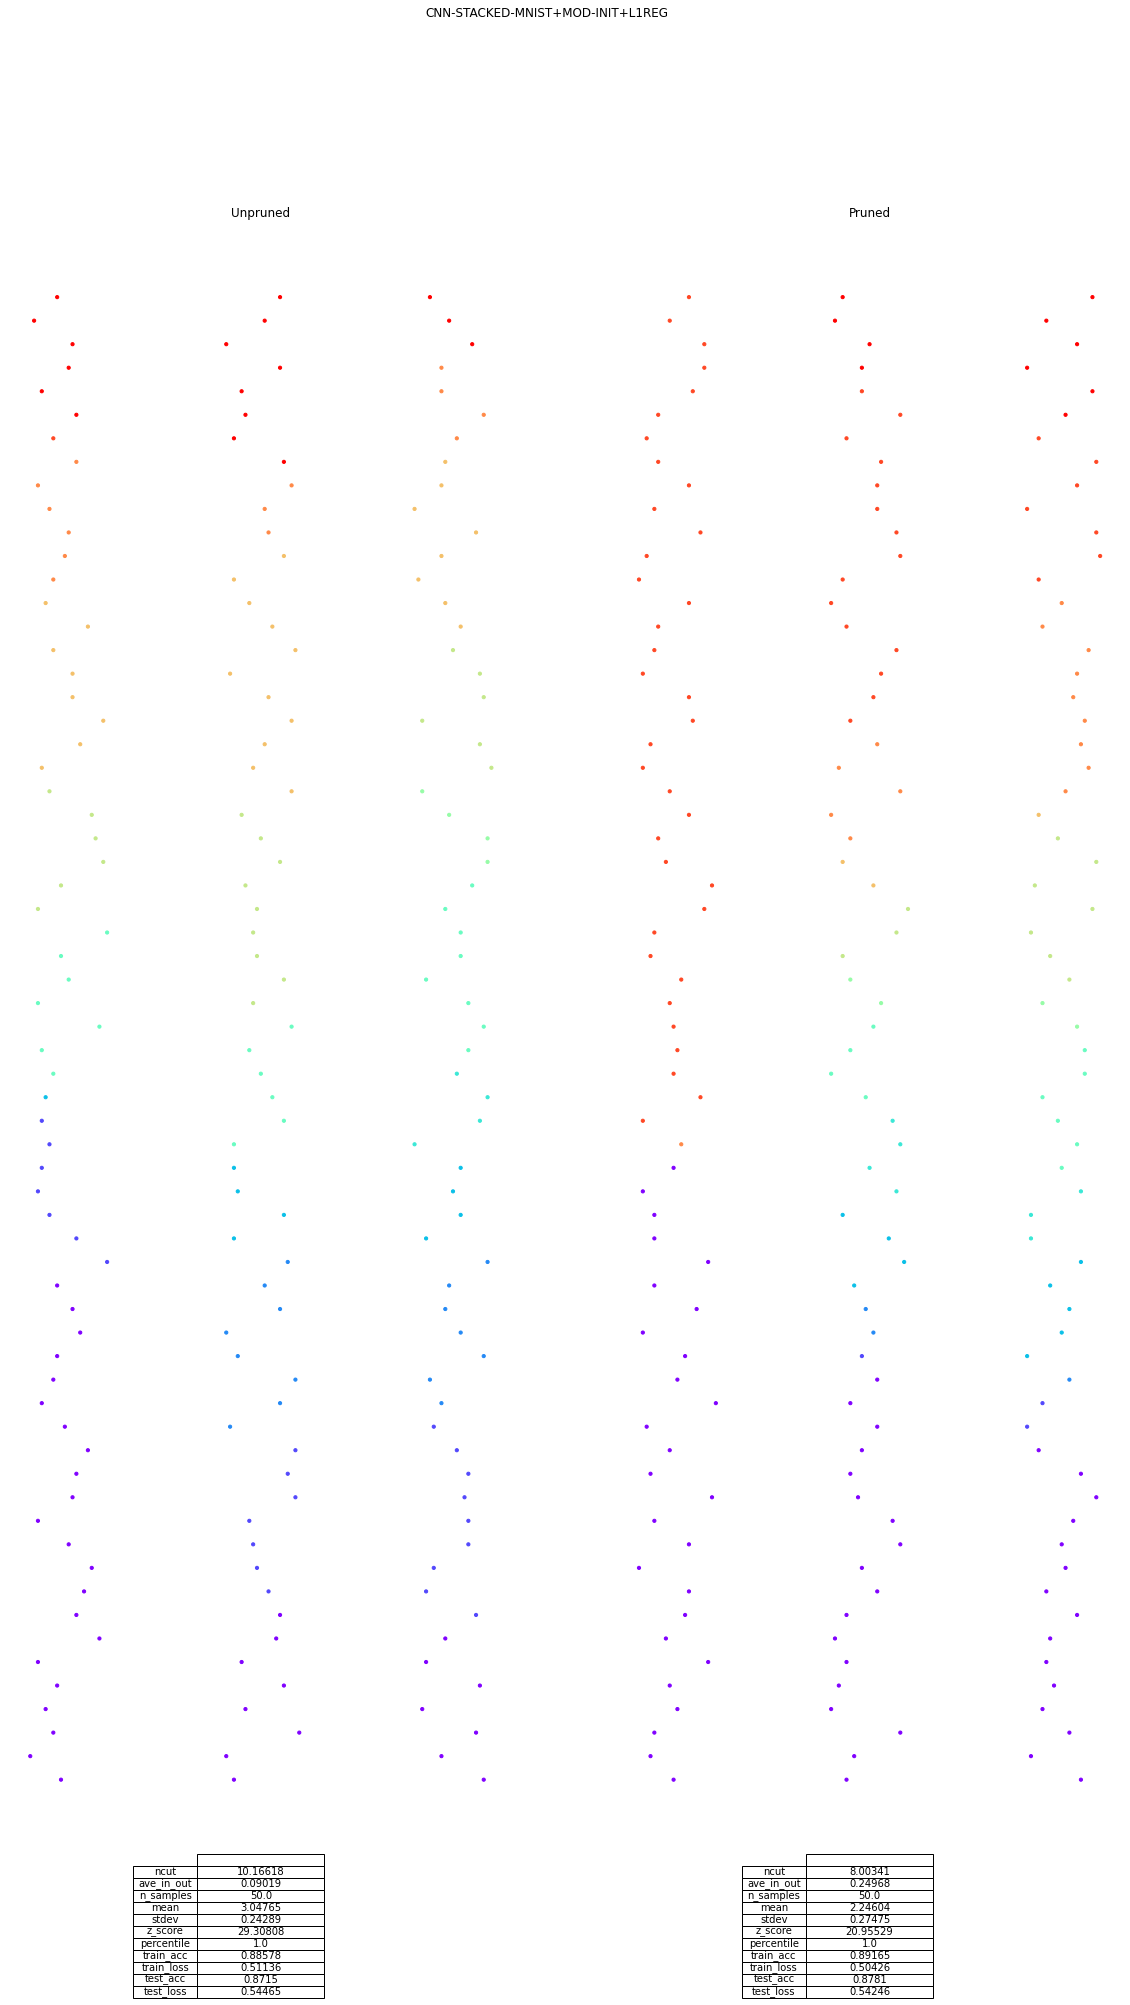

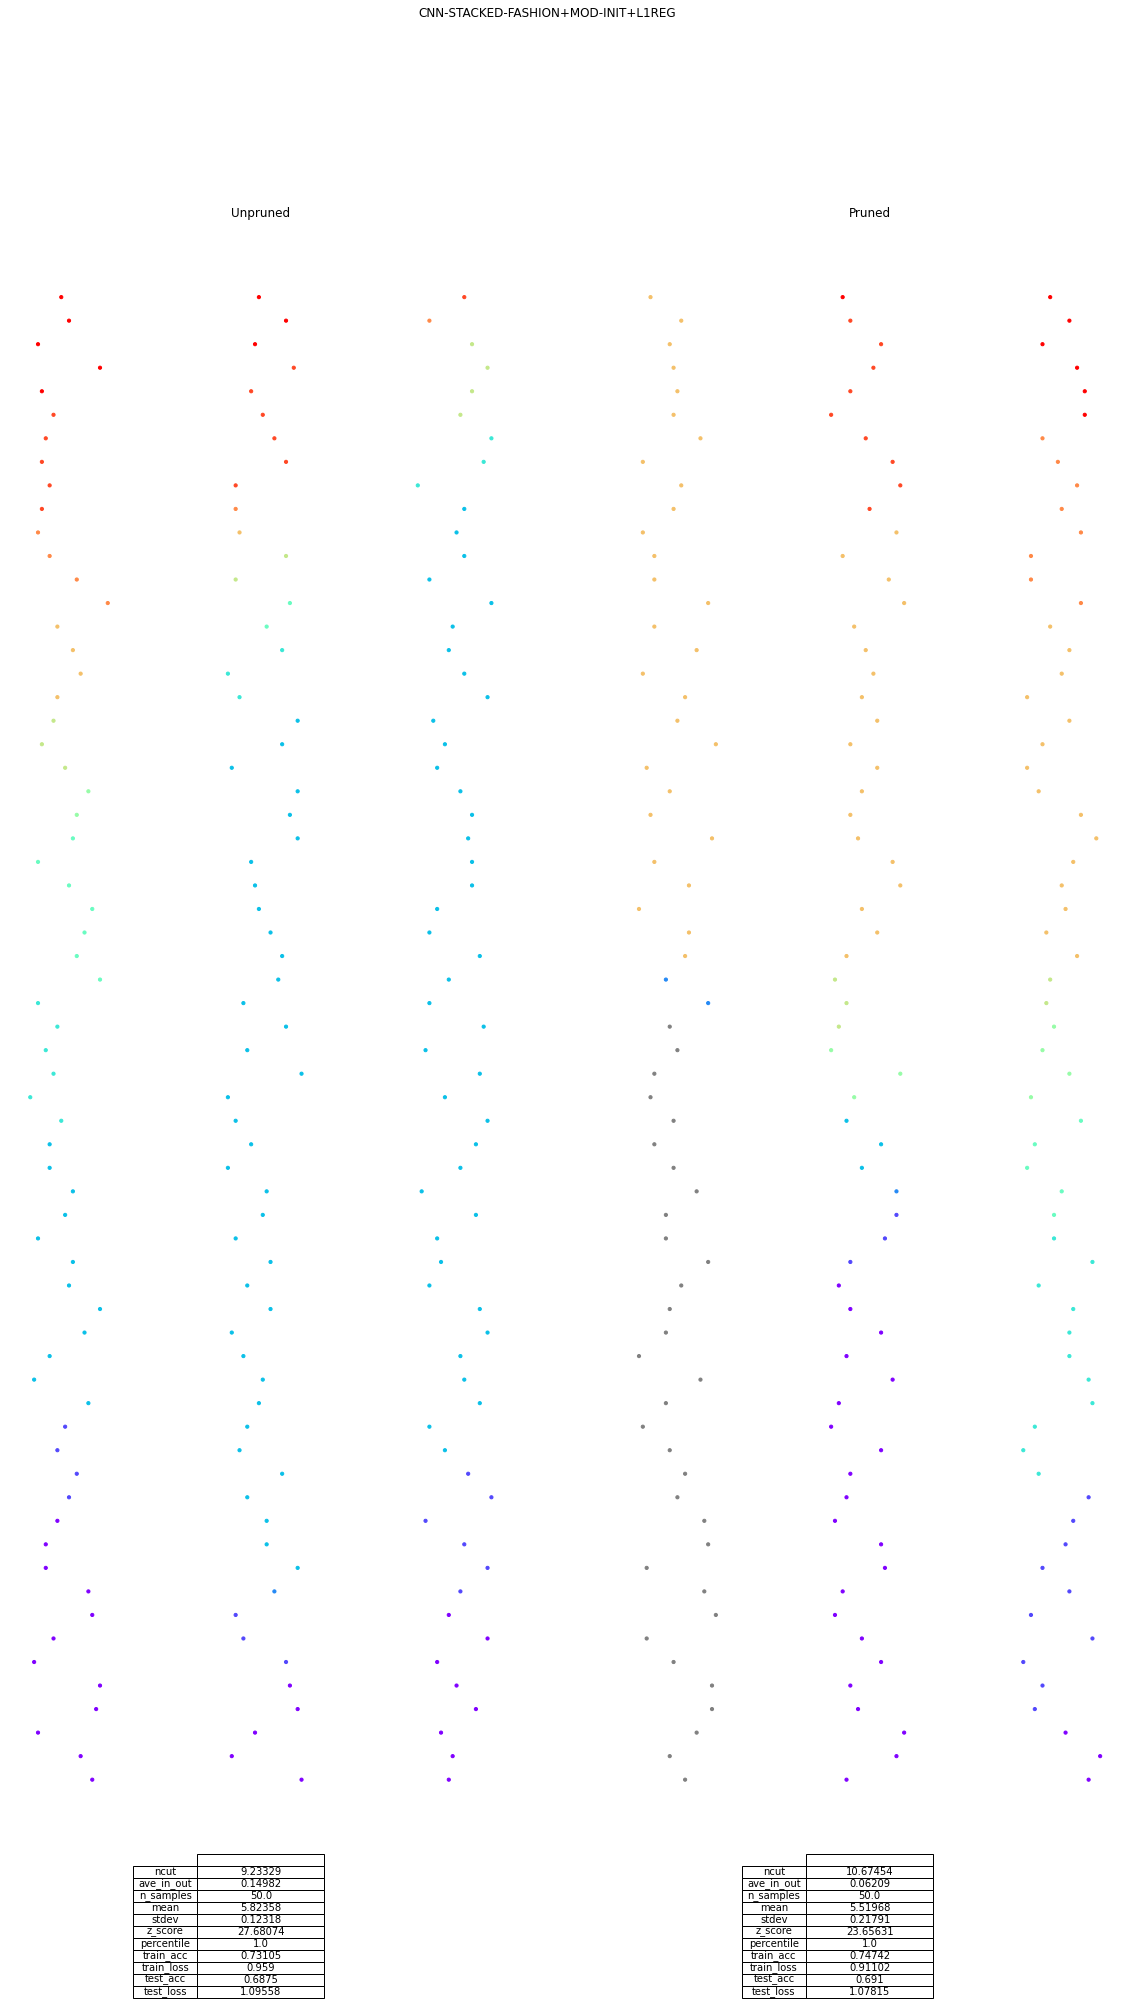

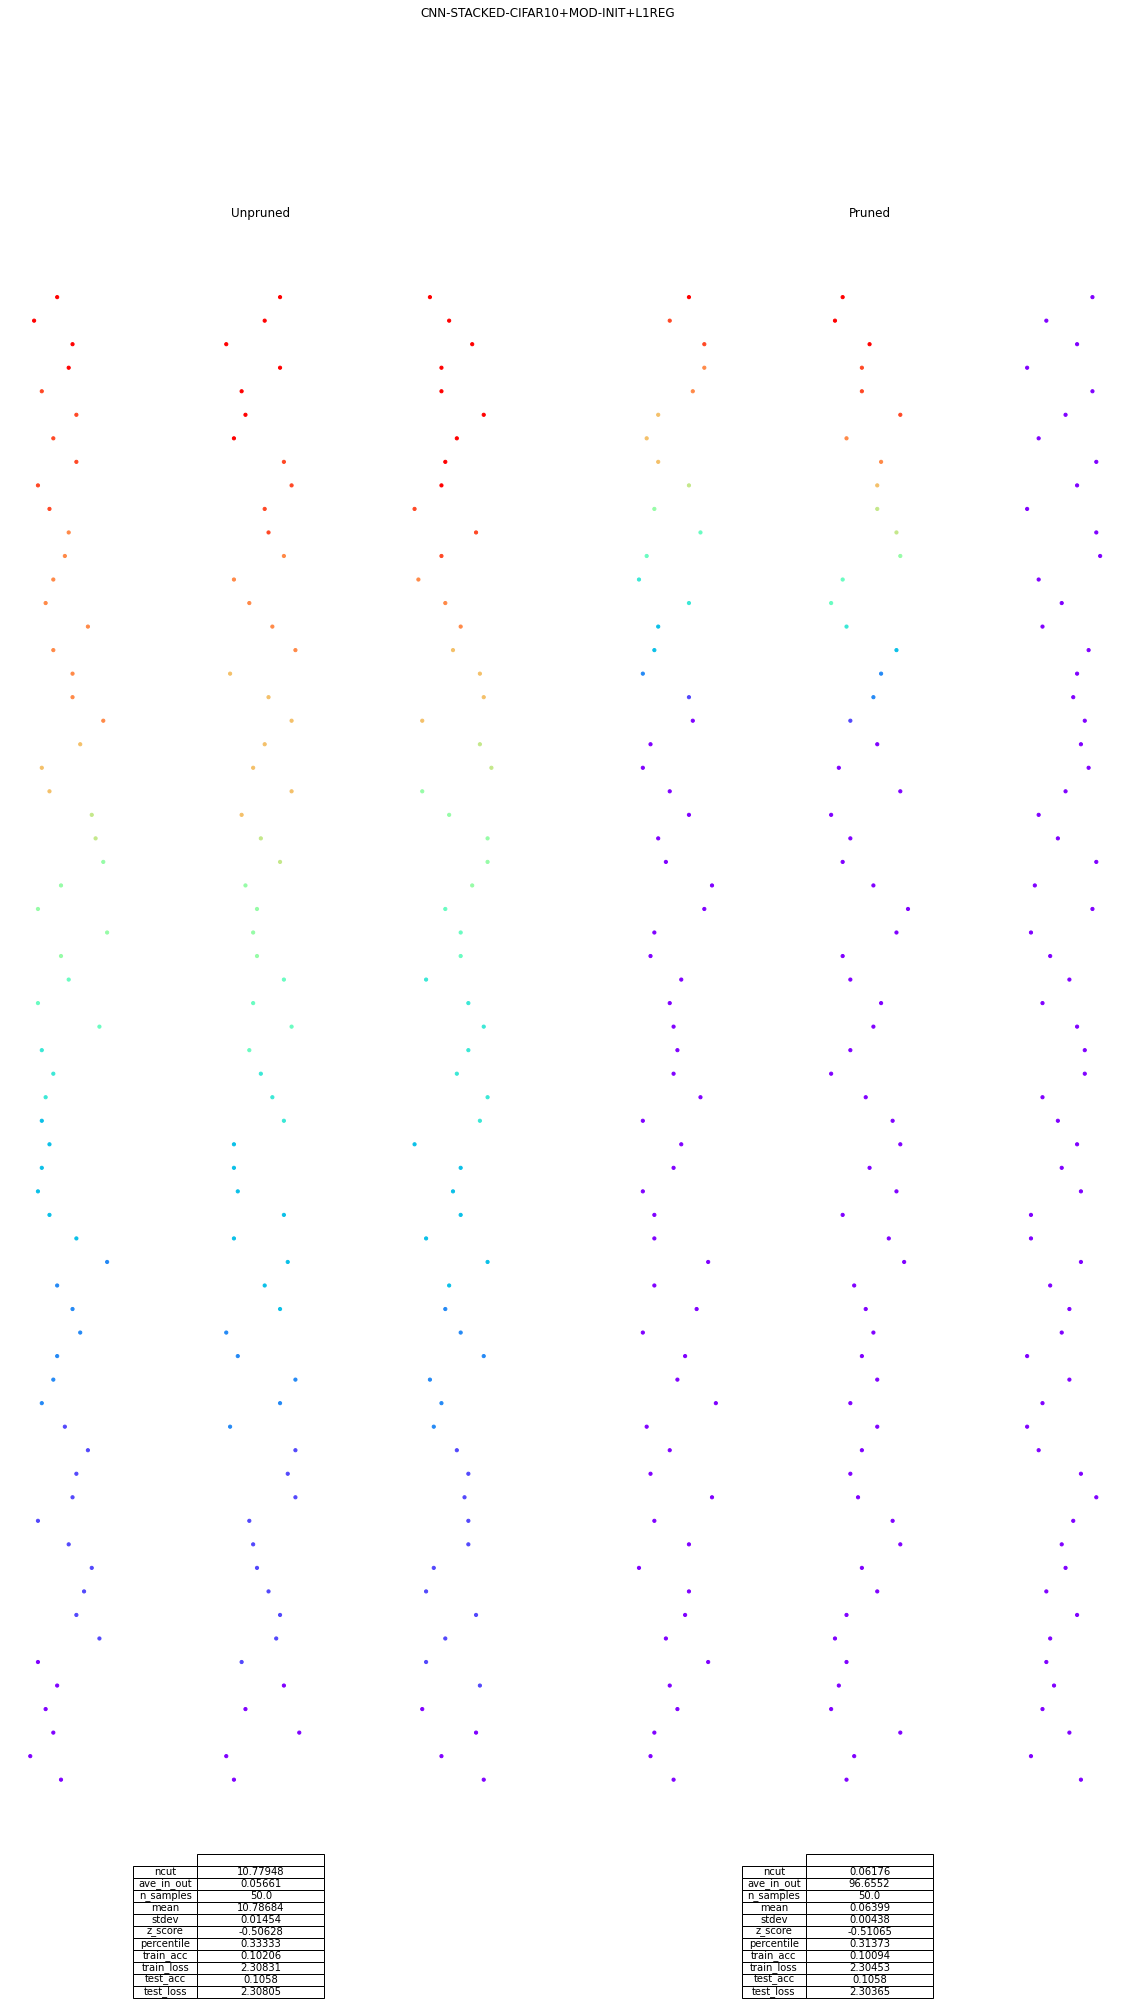

In [3]:
# Clustering

for model_name, path in tqdm(model_paths.items()):

    results = run_double_spectral_cluster(path, n_clusters=n_clust,
                                          n_samples=n_samples, n_workers=n_workers)

    draw_mlp_clustering_report(path, results, n_cluster=n_clust, title=model_name)

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [06:48<34:00, 408.07s/it]

HALVES-MNIST+MOD-INIT+L1REG
Mean percentiles: [0.04761905 0.04761905 0.66666667 0.66666667 0.61904762 1.
 0.95238095 1.         0.57142857 0.85714286 0.80952381 0.76190476
 0.04761905 0.57142857 0.47619048 0.52380952 0.76190476 1.
 1.         0.85714286 1.         0.66666667 0.04761905 0.80952381
 1.         0.95238095 1.         0.38095238 0.85714286 0.33333333
 0.9047619 ]
Range percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.66666667 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 1.         0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905]
chi2 mean p: 0.004811082129944797
chi2 range p: 0.004811082129944797
combined mean p: 0.9123125270160606
combined range p: 3.4962676740521034e-19



 33%|███▎      | 2/6 [12:51<26:18, 394.66s/it]

HALVES-FASHION+MOD-INIT+L1REG
Mean percentiles: [0.14285714 0.52380952 0.47619048 0.57142857 0.80952381 0.85714286
 0.52380952 0.61904762 0.0952381  0.47619048 0.52380952 0.61904762
 0.9047619  0.61904762 0.66666667 0.61904762 0.04761905 0.71428571
 0.57142857 0.71428571 0.61904762 0.04761905 0.38095238 0.61904762
 0.57142857 0.61904762]
Range percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.0952381  0.04761905
 0.04761905 0.04761905 0.04761905 0.23809524 0.04761905 0.04761905
 0.04761905 0.04761905]
chi2 mean p: 0.0017756950852868345
chi2 range p: 0.0017756950852868345
combined mean p: 0.6233925630599187
combined range p: 3.0426563122479576e-17



 50%|█████     | 3/6 [18:39<19:02, 380.77s/it]

HALVES-CIFAR10+MOD-INIT+L1REG
Mean percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905]
Range percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905]
chi2 mean p: 4.4462016386088716e-89
chi2 range p: 4.4462016386088716e-89
combined mean p: 4.684972000784363e-17
combined range p: 4.684972000784363e-17



 67%|██████▋   | 4/6 [41:10<22:23, 671.68s/it]

CNN-STACKED-MNIST+MOD-INIT+L1REG
Mean percentiles: [0.47619048 0.19047619 0.9047619  0.42857143 0.0952381  0.28571429
 0.42857143 0.38095238 0.33333333 0.23809524 0.28571429 0.0952381
 0.52380952 0.76190476 0.66666667 0.52380952 0.23809524 0.14285714
 0.47619048 0.33333333 0.61904762 0.28571429 0.52380952 0.19047619
 0.66666667 0.71428571 0.52380952]
Range percentiles: [0.28571429 0.04761905 0.04761905 0.42857143 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.19047619 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905]
chi2 mean p: 0.5290585824856526
chi2 range p: 0.5290585824856526
combined mean p: 0.27709226491566713
combined range p: 1.23698671979141e-16



 83%|████████▎ | 5/6 [58:20<12:59, 779.21s/it]

CNN-STACKED-FASHION+MOD-INIT+L1REG
Mean percentiles: [0.47619048 0.66666667 0.19047619 0.19047619 0.0952381  0.14285714
 0.14285714 0.04761905 0.33333333 0.23809524 0.19047619 0.23809524
 0.28571429 0.23809524 0.23809524 0.0952381  0.04761905 0.42857143
 0.28571429 0.28571429]
Range percentiles: [1.         0.61904762 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.0952381  0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.14285714
 0.04761905 0.04761905]
chi2 mean p: 0.03825335758115644
chi2 range p: 0.03825335758115644
combined mean p: 0.0015105782612875073
combined range p: 1.7482444808035465e-11



100%|██████████| 6/6 [1:20:09<00:00, 938.08s/it]

100%|██████████| 6/6 [1:20:09<00:00, 801.53s/it]

CNN-STACKED-CIFAR10+MOD-INIT+L1REG
Mean percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905]
Range percentiles: [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
 0.04761905]
chi2 mean p: 2.9102668730271908e-93
chi2 range p: 2.9102668730271908e-93
combined mean p: 1.1114412036693221e-17
combined range p: 1.1114412036693221e-17



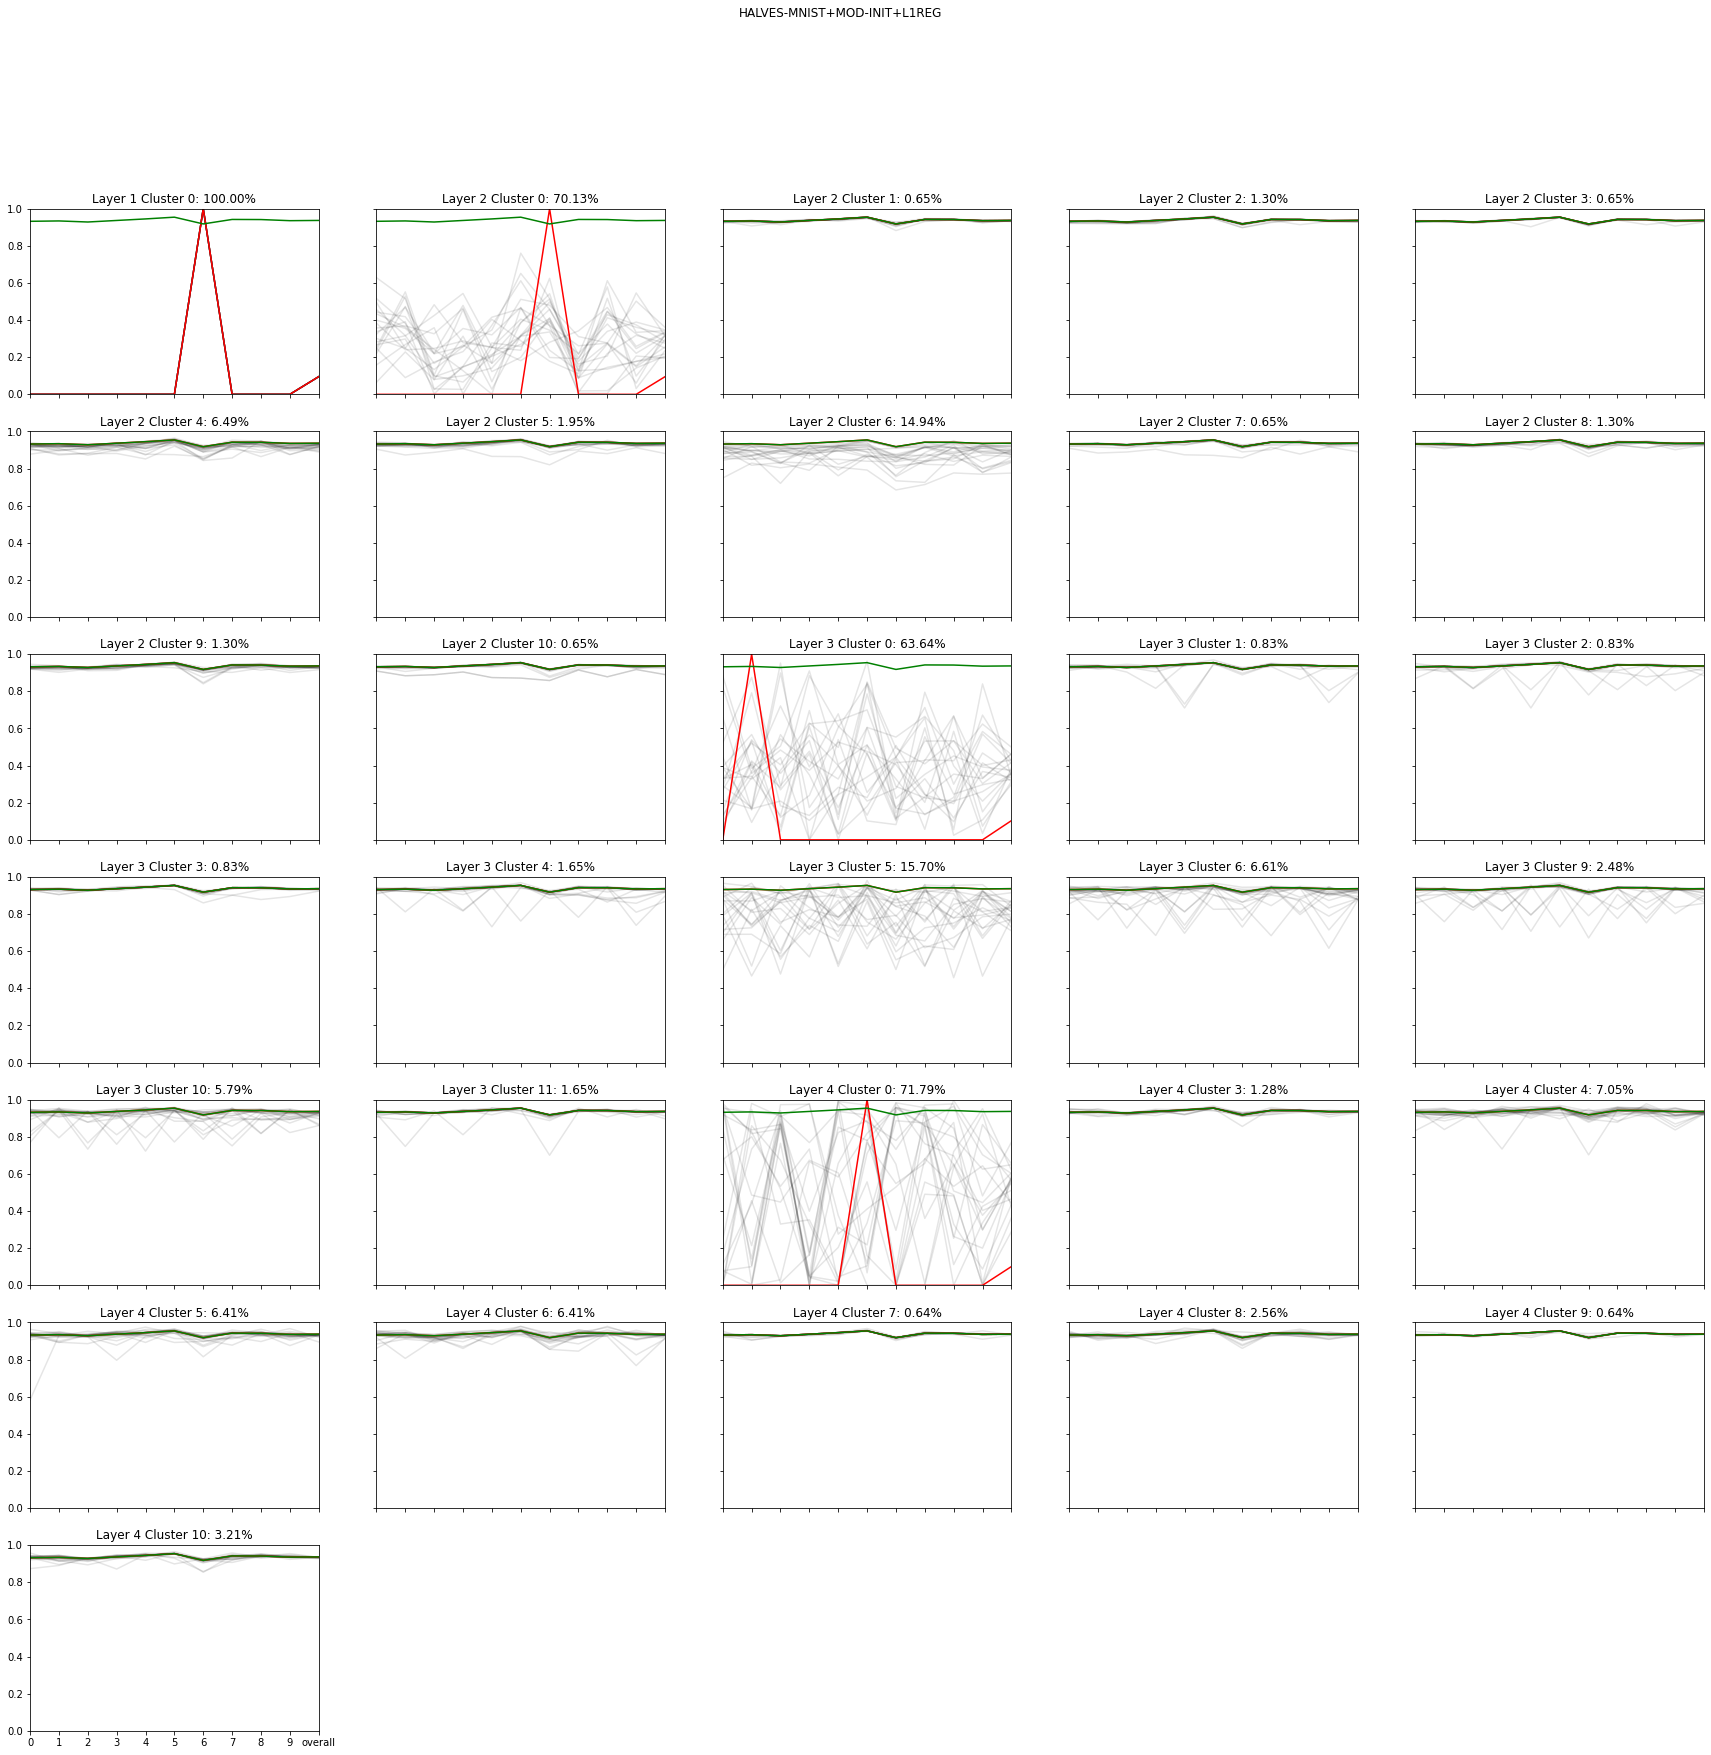

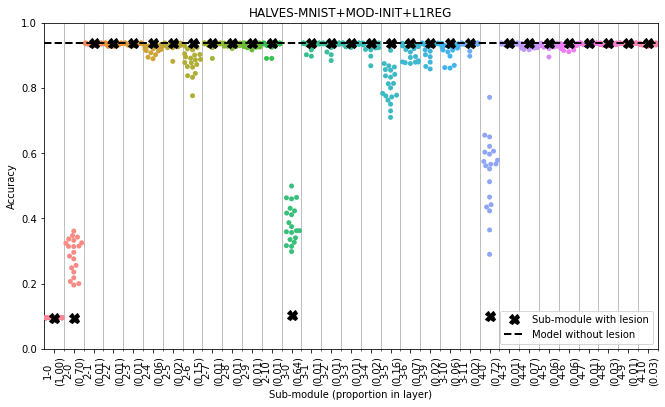

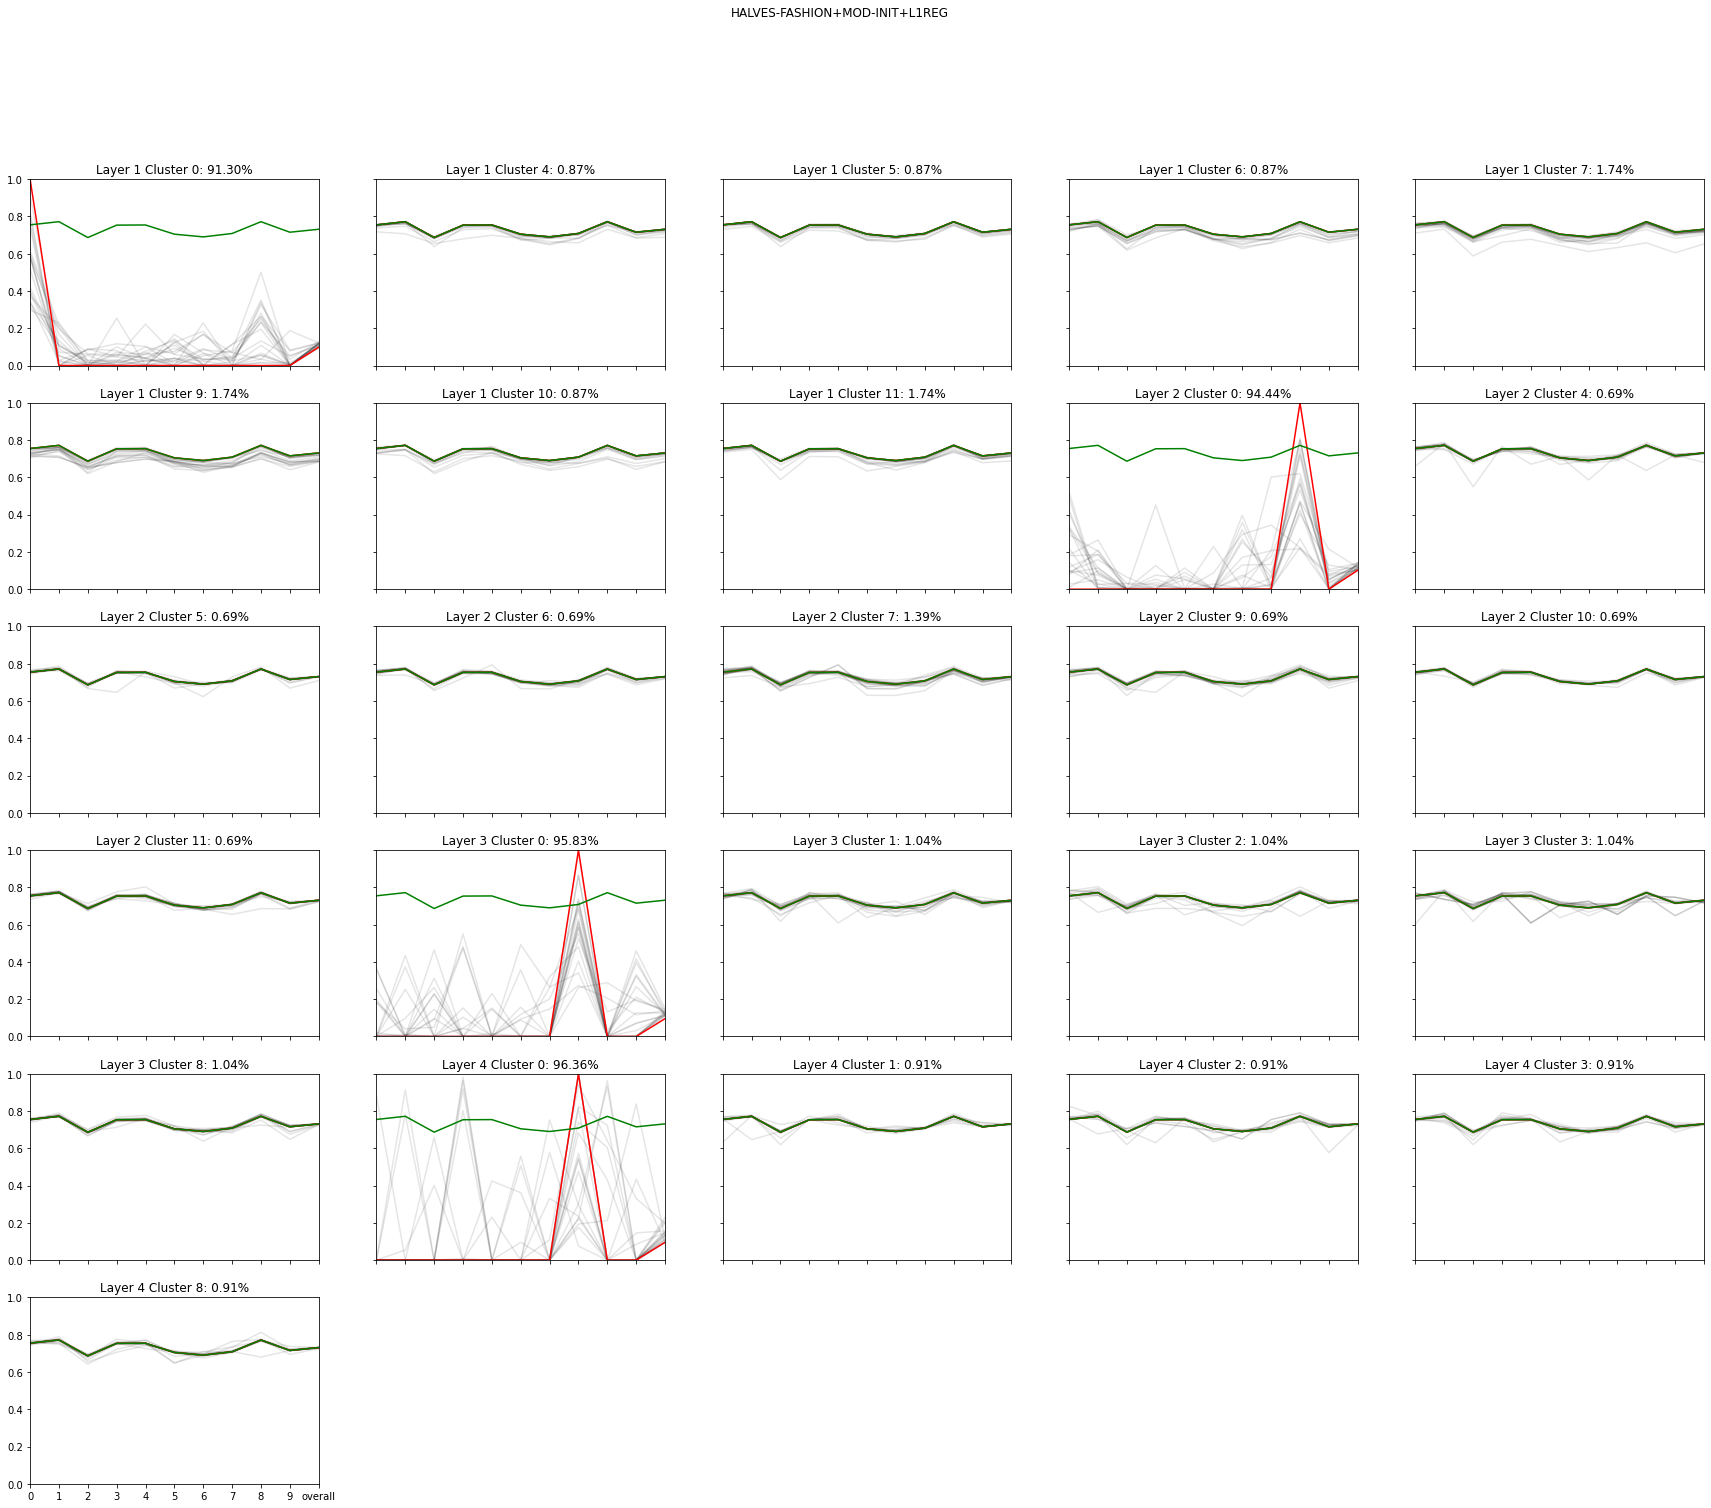

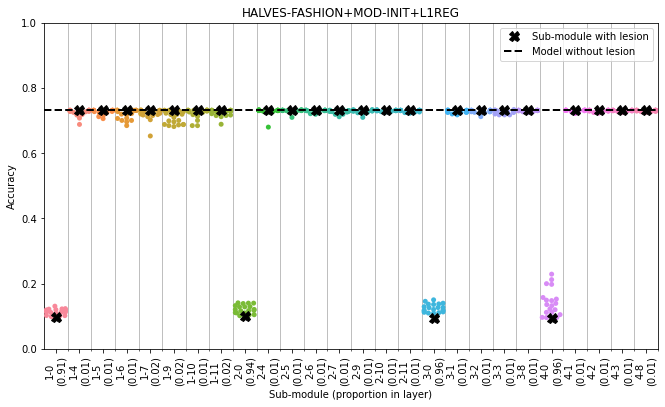

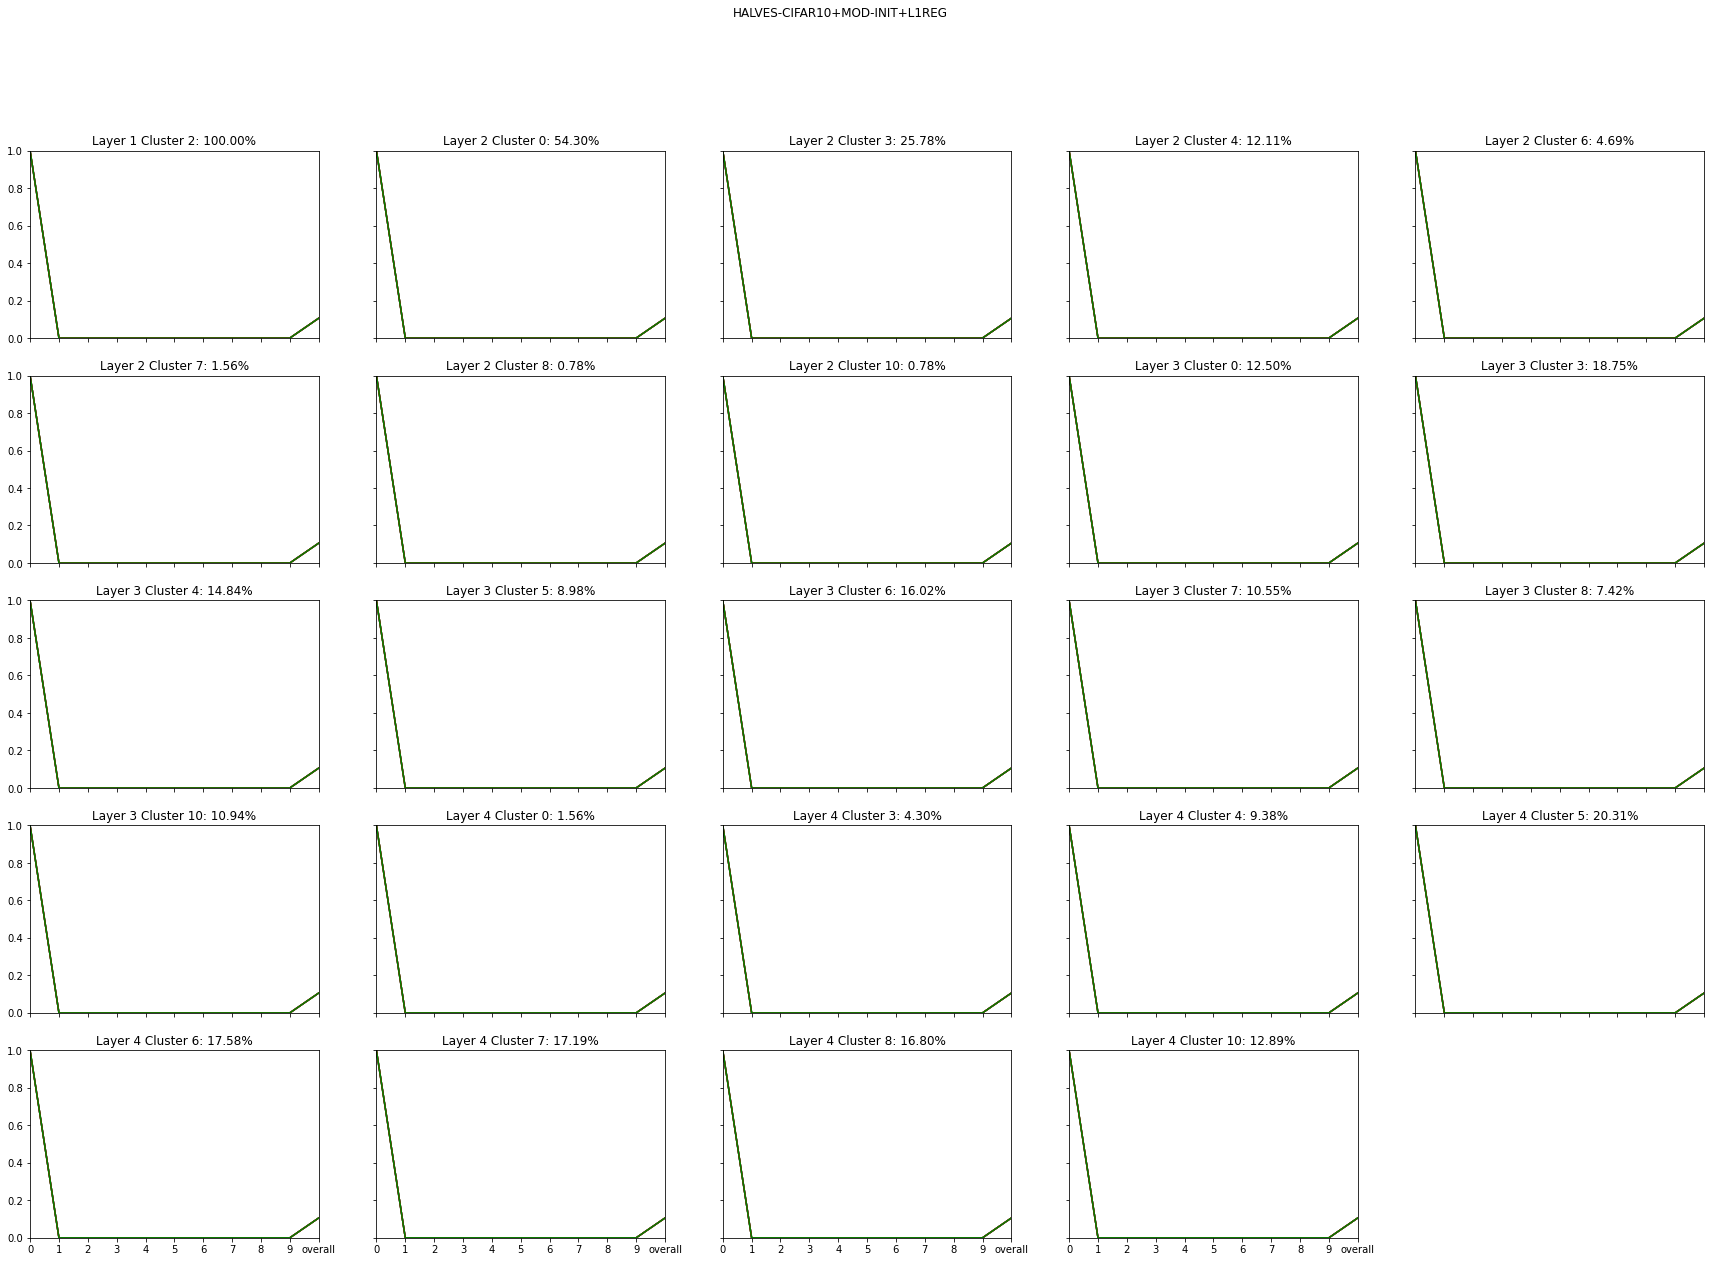

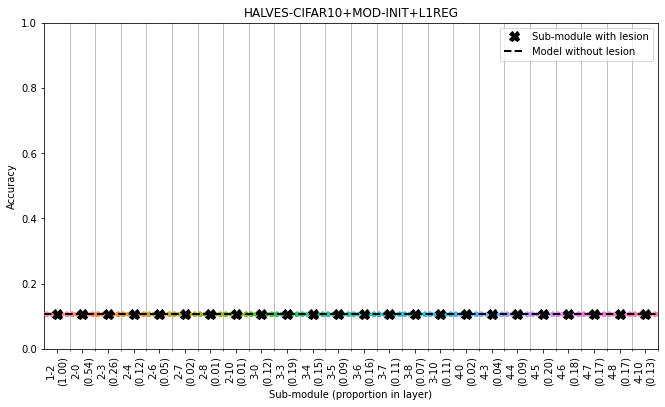

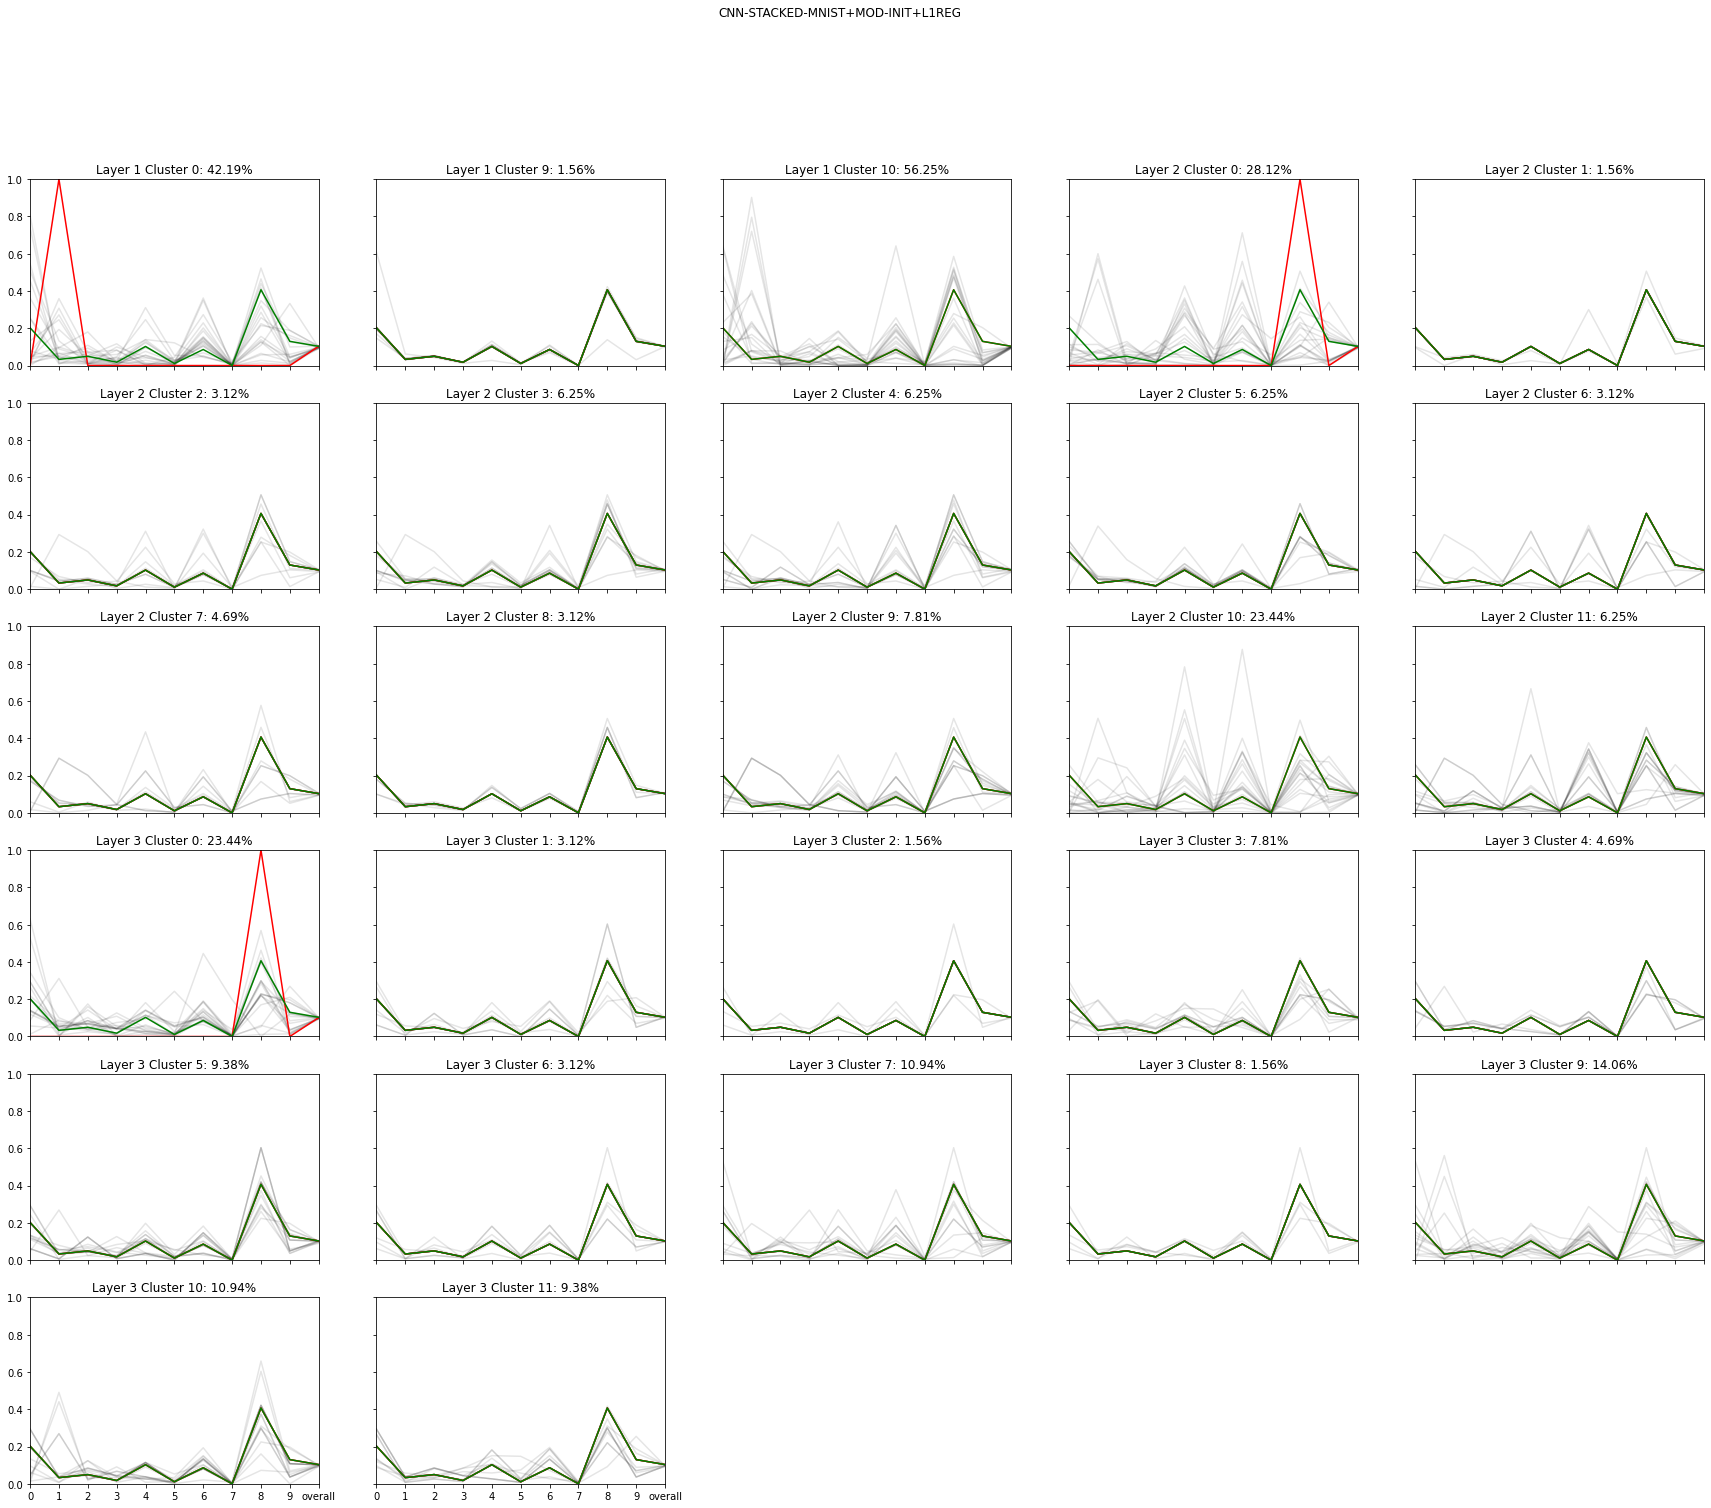

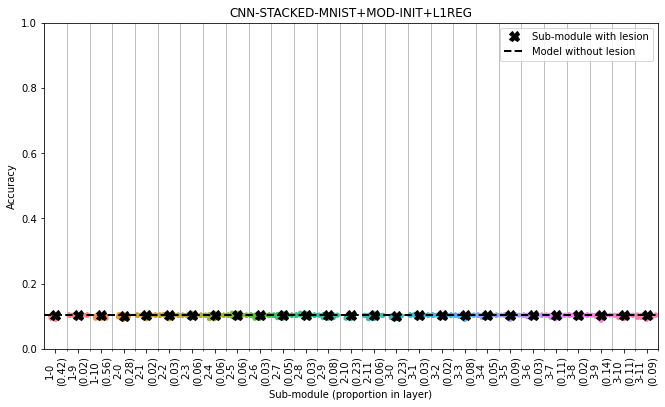

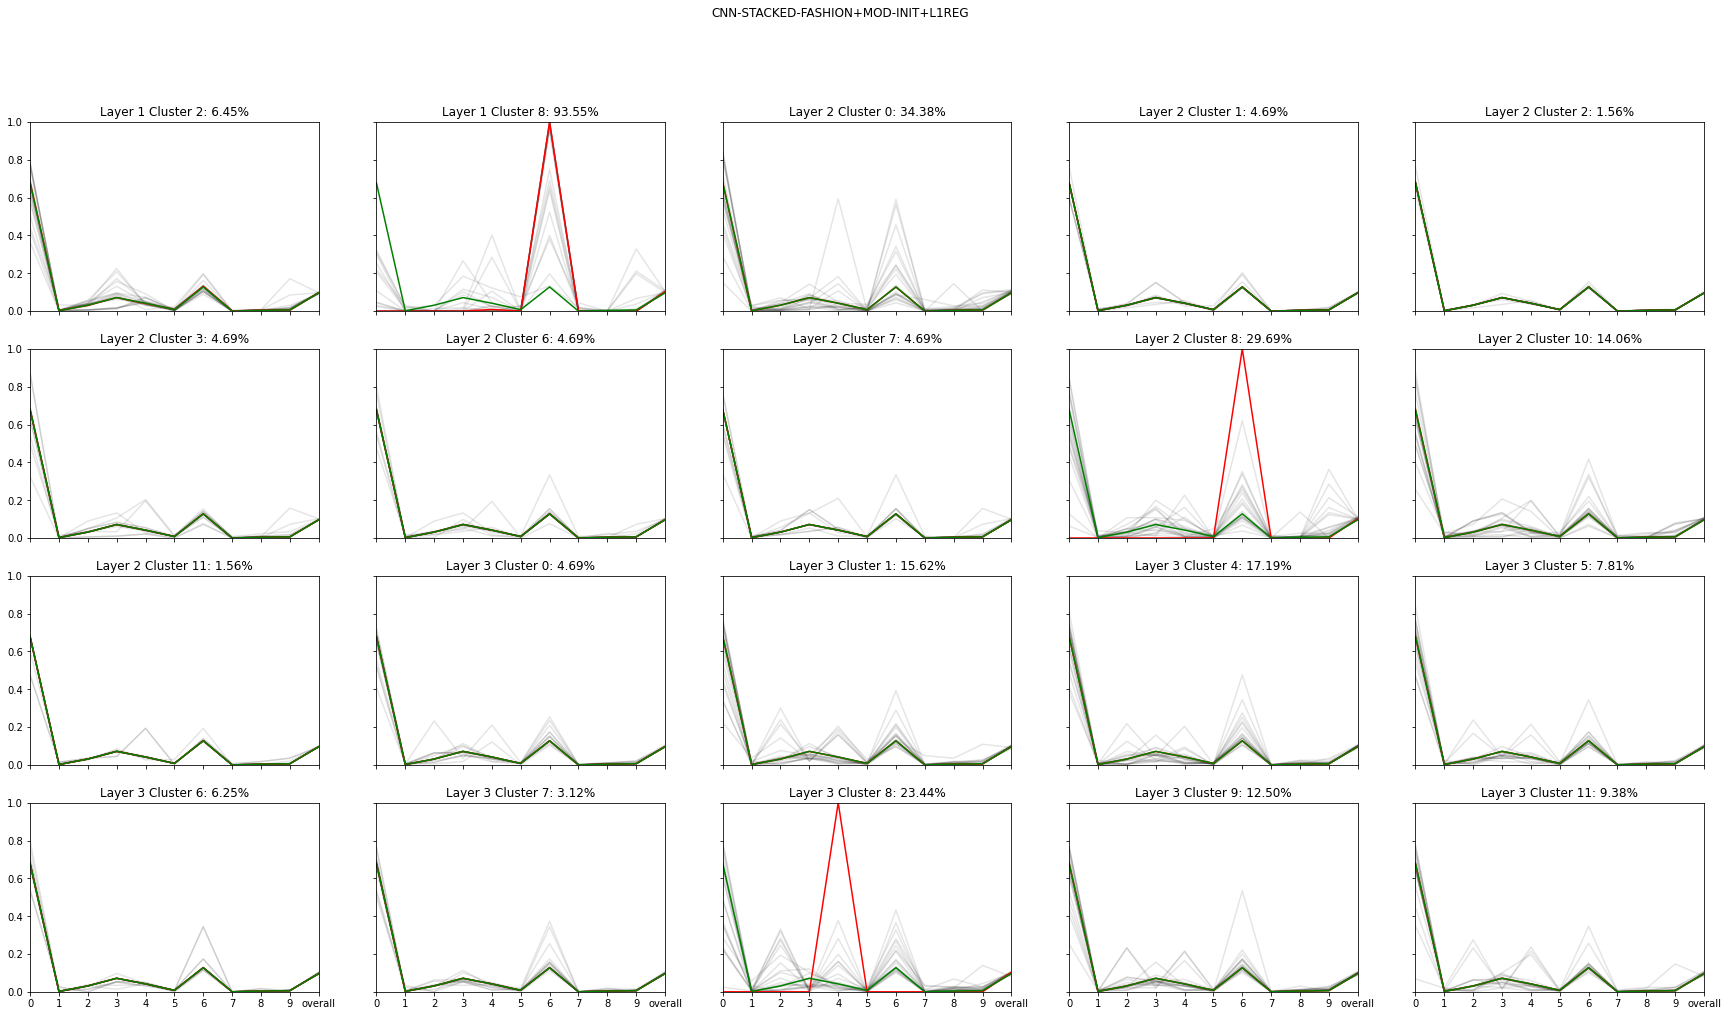

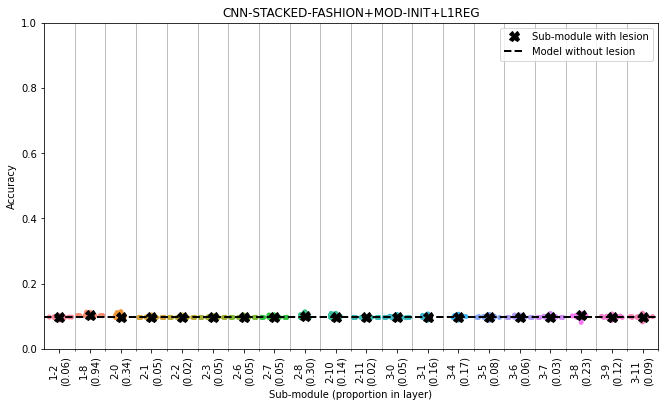

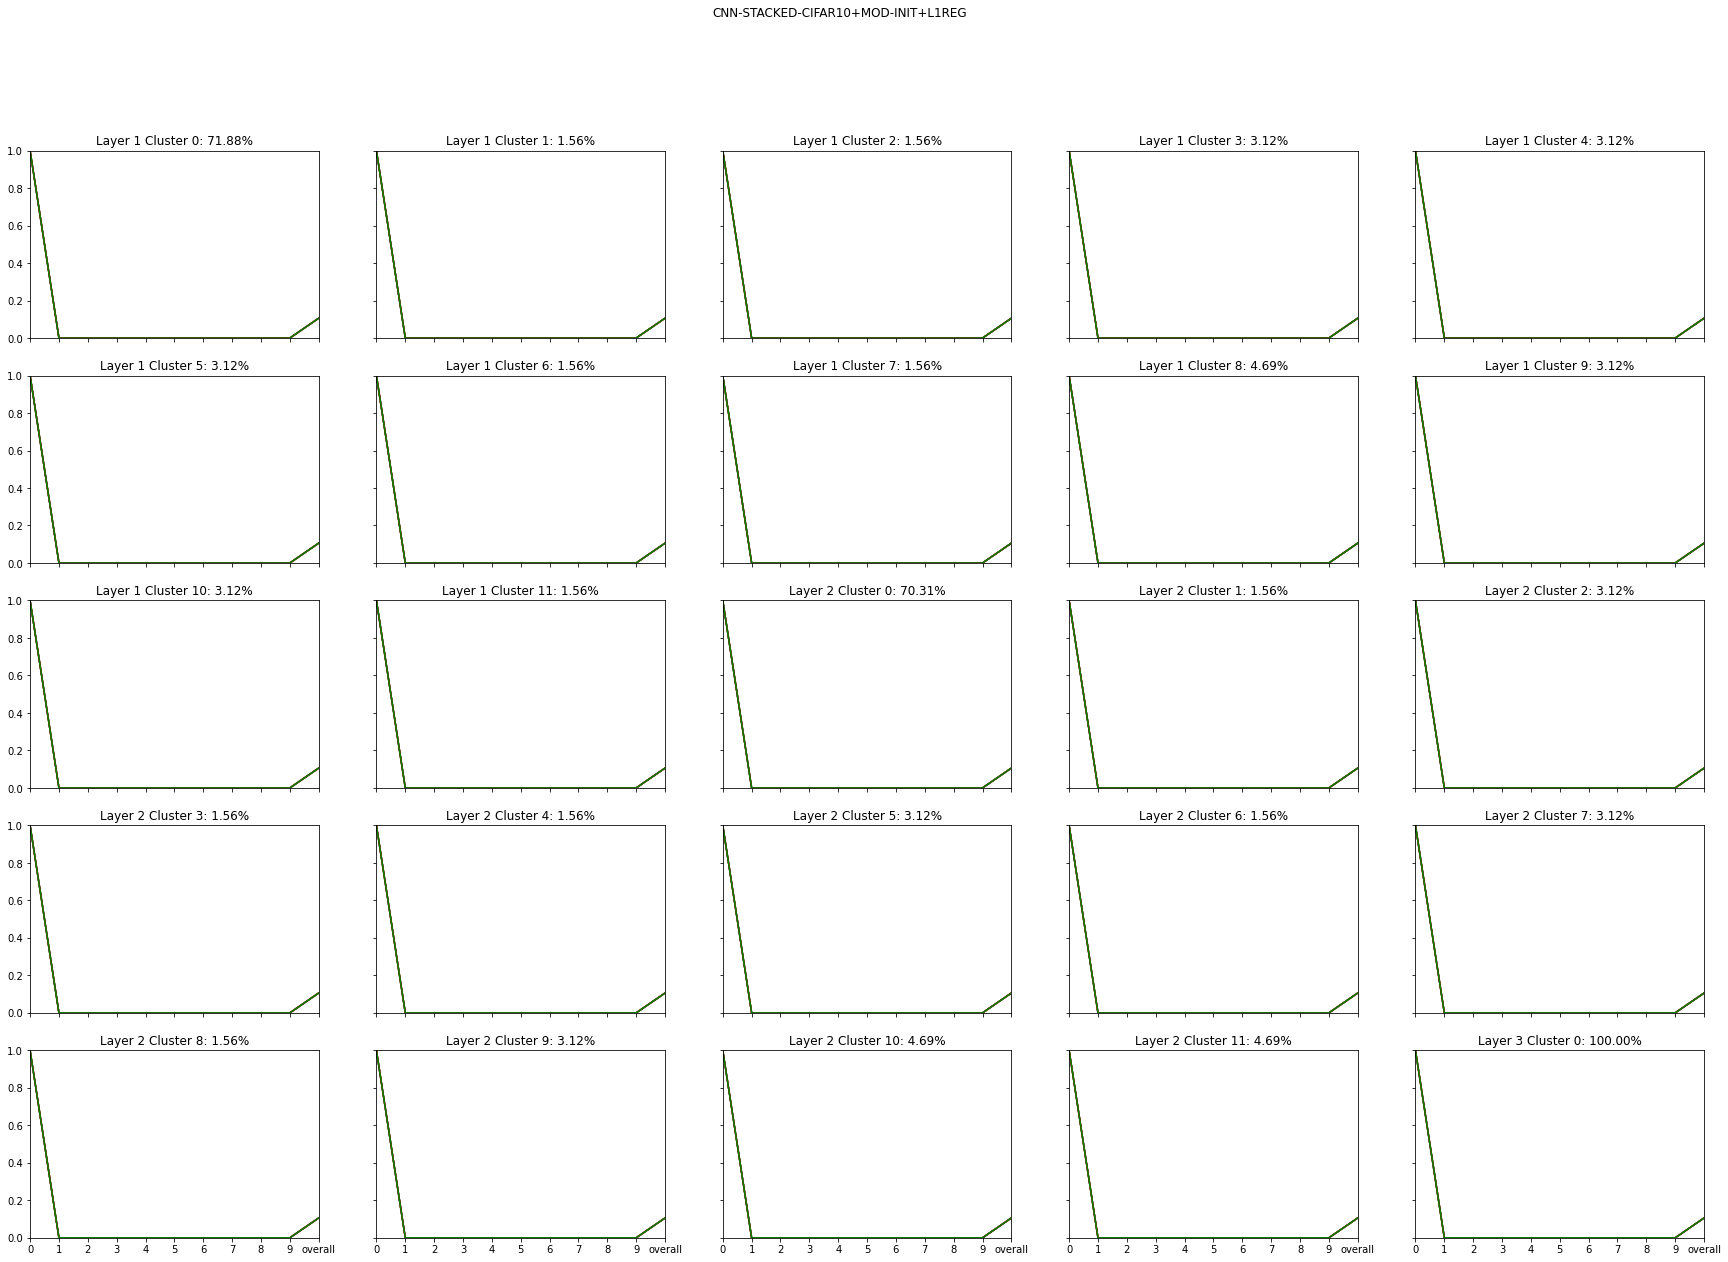

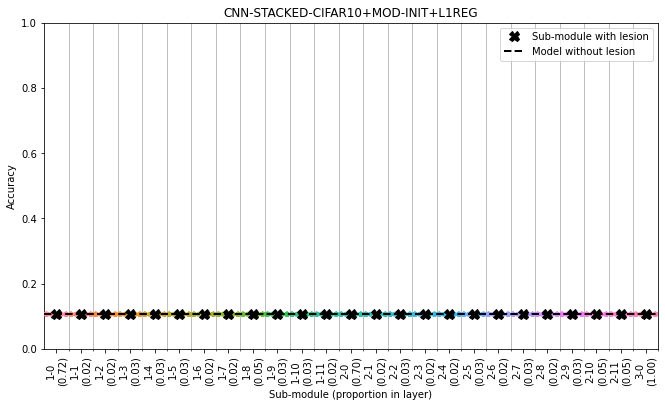

In [4]:
# Lesion

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

    for model_name, dataset_name in tqdm(models):

        if 'CNN' in model_name:
            depth = 2
        else:
            depth=1

        (true_results,
         all_random_results,
         metadata,
         evaluation) = perform_lesion_experiment('.' + DATA_PATHS[dataset_name],
                                                 get_model_path(model_name),
                                                 n_clusters=n_clust,
                                                 n_shuffles=n_shuffles,
                                                 depth=depth)

        plot_all_damaged_clusters(true_results, all_random_results, metadata, evaluation,
                                  title=f'{model_name}')

        plot_overall_damaged_clusters(true_results, all_random_results, metadata, evaluation,
                                      title=f'{model_name}')

        hypo_results = do_lesion_hypo_tests(evaluation, true_results, all_random_results)
        mean_percentiles = hypo_results['mean_percentiles']
        range_percentiles = hypo_results['range_percentiles']
        chi2_p_means = hypo_results['chi2_p_means']
        chi2_p_ranges = hypo_results['chi2_p_ranges']
        combined_p_means = hypo_results['combined_p_means']
        combined_p_ranges = hypo_results['combined_p_ranges']
        print(f'{model_name}')
        print(f'Mean percentiles: {mean_percentiles}')
        print(f'Range percentiles: {range_percentiles}')
        print(f'chi2 mean p: {chi2_p_means}')
        print(f'chi2 range p: {chi2_p_means}')
        print(f'combined mean p: {combined_p_means}')
        print(f'combined range p: {combined_p_ranges}')
        print()

In [5]:
# Activations

activations_results = {}

for model_name, path in tqdm(model_paths.items()):

    if model_name == 'HALVES-CIFAR10+MOD-INIT+L1REG':
        continue

    activations_results[model_name] = run_activations_cluster_experiment(path, path,
                                                                        n_clusters=n_clust,
                                                                        n_samples=n_samples)

act_results_tbl = get_activations_cluster_results_tbl([m[0] for m in models
                                                       if m[0]!='HALVES-CIFAR10+MOD-INIT+L1REG'],
                                                      activations_results)
act_results_tbl

  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [05:31<27:36, 331.31s/it]

 33%|███▎      | 2/6 [09:57<20:46, 311.69s/it]

 67%|██████▋   | 4/6 [10:14<07:21, 220.71s/it]

 83%|████████▎ | 5/6 [10:43<02:43, 163.39s/it]

100%|██████████| 6/6 [10:53<00:00, 117.24s/it]

100%|██████████| 6/6 [10:53<00:00, 108.87s/it]

model  weight_ncut   act_ncut  \
0         HALVES-MNIST+MOD-INIT+L1REG: unpruned     8.754505   8.495603   
1           HALVES-MNIST+MOD-INIT+L1REG: pruned     8.113122   8.006209   
2       HALVES-FASHION+MOD-INIT+L1REG: unpruned     8.730015   8.831867   
3         HALVES-FASHION+MOD-INIT+L1REG: pruned     0.544372   8.646353   
4    CNN-STACKED-MNIST+MOD-INIT+L1REG: unpruned    10.203964   9.343447   
5      CNN-STACKED-MNIST+MOD-INIT+L1REG: pruned     8.067388   8.973071   
6  CNN-STACKED-FASHION+MOD-INIT+L1REG: unpruned     9.264587   8.495501   
7    CNN-STACKED-FASHION+MOD-INIT+L1REG: pruned    10.723591   8.472151   
8  CNN-STACKED-CIFAR10+MOD-INIT+L1REG: unpruned    10.797213  10.546098   
9    CNN-STACKED-CIFAR10+MOD-INIT+L1REG: pruned     0.061757  11.537760   

   act_ncut_percentile  act_ncut_z_score  transfer_ncut  weight_entropy  \
0             0.019608        -79.796101      10.201287        6.504280   
1             0.019608        -47.479965       2.002082        4.680766   
2             0.019608       -101.162519      10.446773        6.607480   
3             0.019608        -60.114637       0.000000        3.238042   
4             0.019608         -9.505804       3.009702        4.952523   
5             0.019608         -8.194572       0.000000        5.046656   
6             0.019608        -19.417949      10.182916        4.426608   
7             0.019608        -13.419406       0.000000        4.408404   
8             0.058824         -1.817681      10.307236        4.989276   
9             0.352941         -0.545529       3.308558        3.472581   

   act_entropy  norm_mutual_info  nmi_percentile  nmi_z_score  \
0     6.088329          0.202839        1.000000    25.784157   
1     5.627332          0.035062        0.039216    -1.455878   
2     6.020092          0.201752        1.000000    28.683540   
3     5.598193         -0.875000        0.019608          NaN   
4     3.673384          0.200263        0.803922     0.874518   
5     3.537190          1.000000        0.019608          NaN   
6     4.091640          0.496367        1.000000    10.279759   
7     3.841424         -1.000000        0.019608          NaN   
8     3.264104          0.529432        0.568627     0.099649   
9     2.453800          0.533645        0.666667     0.412850   

   weight_intra_mean_rsq  weight_inter_mean_rsq  
0               0.040081               0.013402  
1               0.027459               0.020208  
2               0.055507               0.021943  
3               0.038714               0.034382  
4               0.277200               0.298205  
5               0.221244               0.220672  
6               0.349768               0.134123  
7               0.140192               0.124822  
8               0.392849               0.348315  
9               0.343358               0.380106